In [1]:
import sys
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
img = './image/bananas.jpg'
model = './googlenet/bvlc_googlenet.caffemodel'
config = './googlenet/deploy.prototxt'
net = cv2.dnn.readNet(model, config)
if net.empty():
    print('Network load failed!')
    sys.exit()
classNames = None
with open('./googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [48]:
img = load_img(img, target_size=(224, 224))
img = img_to_array(img)
blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
net.setInput(blob)
prob = net.forward()
out = prob.flatten()
classId = np.argmax(out)
confidence = out[classId]
label = classNames[classId]
print(label, confidence)

banana 0.37428185


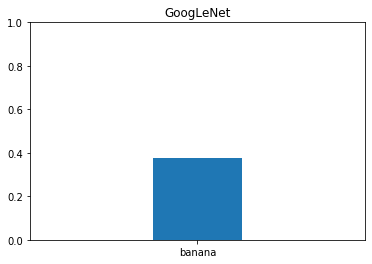

In [49]:
x = np.arange(1)
plt.bar(x, height=[confidence])
plt.title('GoogLeNet')
plt.xticks(x, [label])
plt.axis([-1.5, 1.5, 0, 1])
plt.show()